In [1]:
from PIL import Image

In [32]:
pieces = Image.open('pieces.png')

In [34]:
im2 = Image.open('test.png')

In [39]:
pieces.getbbox()

(7, 4, 366, 123)

In [40]:
box = (0,0,64,64)

In [38]:
region = pieces.crop(box)

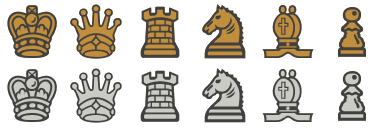

In [41]:
display(pieces)

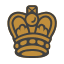

In [42]:
display(region)

In [45]:
type(region)

PIL.Image.Image

In [46]:
type(pieces)

PIL.PngImagePlugin.PngImageFile

In [48]:
region.save('king.png')

In [56]:
canvas = im2.crop((0, 0, 128, 128))

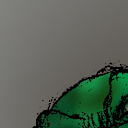

In [57]:
display(canvas)

In [58]:
canvas.paste(region, box, region)

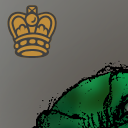

In [59]:
display(canvas)

In [69]:
board = Image.new('RGBA', (64*8, 64*8),'black')
whiteSquare = Image.new('RGB', (64, 64), 'white')

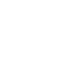

In [70]:
display(whiteSquare)

In [75]:
for r in range(8):
    for c in range(8):
        if (r+c)%2 == 0:
            board.paste(whiteSquare, (r*64, c*64, (r+1)*64, (c+1)*64))

In [77]:
board.save('board.png')